# Hebb則と教師なし学習
## Hebb則
神経回路はどのようにして自己組織化するのだろうか．1940年代にカナダの心理学者Donald O. Hebbにより著書"The Organization of Behavior"{cite:p}`Hebb1949-iv` で提案された学習則は「細胞Aが反復的または持続的に細胞Bの発火に関与すると，細胞Aが細胞Bを発火させる効率が向上するような成長過程または代謝変化が一方または両方の細胞に起こる」というものであった．すなわち，発火に時間的相関のある細胞間のシナプス結合を強化するという学習則である．これを**Hebbの学習則 (Hebbian learning rule)** あるいは**Hebb則(Hebb's rule)** という．Hebb則は (Hebb自身ではなく) Shatzにより"cells that fire together wire together" (共に活動する細胞は共に結合する)と韻を踏みながら短く言い換えられている {cite:p}`Shatz1992-he`．

### Hebb則の導出
数式でHebb則を表してみよう．$n$個のシナプス前細胞と$m$個の後細胞の発火率をそれぞれ$\mathbf{x}\in \mathbb{R}^n, \mathbf{y}\in \mathbb{R}^m$ とする．前細胞と後細胞間のシナプス結合強度を表す行列を$\mathbf{W}\in \mathbb{R}^{m\times n}$とし，$\mathbf{y}=\mathbf{W}\mathbf{x}$が成り立つとする．このようなモデルを線形ニューロンモデル (Linear neuron model) という．このとき，Hebb則は

$$
\tau\frac{d\mathbf{W}}{dt}=\mathbf{y}\mathbf{x}^\top=(\text{post})\cdot (\text{pre})^\top
$$

として表される．ただし，$\tau$は時定数であり，$\eta:=1/\tau$ は**学習率 (learning rate)** と呼ばれる，学習の速さを決定するパラメータとなる．

このHebb則は数学的に導出されたものではないが，特定の目的関数を神経活動及び重みを変化させて最適化するようなネットワークを構築すれば自然に出現する (本書ではこれに該当するAmari-Hopfieldモデル，Boltzmannマシン，スパース符号化モデル，予測符号化モデルを取り上げる．もちろんこれ以外のモデルでも現れる)．こうしたモデルでは，先に目的関数 $\mathcal{L}$ を定義し，その目的関数を最小化するような神経活動 $\mathbf{z}$ および重み行列 $\mathbf{W}$ のダイナミクスをそれぞれ,

$$
\frac{d \mathbf{z}}{dt}\propto-\frac{\partial \mathcal{L}}{\partial \mathbf{z}},\ \frac{d \mathbf{W}}{dt}\propto-\frac{\partial \mathcal{L}}{\partial \mathbf{W}}
$$

として導出する．この手順の逆を行う，すなわち先に神経細胞の活動ダイナミクスを定義し，神経活動で積分することで神経回路の目的関数$\mathcal{L}$を導出でき，さらに$\mathcal{L}$を重み行列で微分することでHebb則が導出できる {cite:p}`Isomura2022-ro`．Hebb則の導出を連続時間線形ニューロンモデル $\dfrac{d\mathbf{y}}{dt}=\mathbf{W}\mathbf{x}$ を例にして考えよう．ここで$\dfrac{\partial\mathcal{L}}{\partial\mathbf{y}}:=-\dfrac{d\mathbf{y}}{dt}$となるような目的関数 $\mathcal{L}\in \mathbb{R}$を仮定すると，

$$
\mathcal{L}=-\int \mathbf{W}\mathbf{x}\ d\mathbf{y}=-\mathbf{y}^\top \mathbf{W}\mathbf{x}
$$

となる．これをさらに$\mathbf{W}$で微分すると，

$$
\dfrac{\partial\mathcal{L}}{\partial\mathbf{W}}=-\mathbf{y}\mathbf{x}^\top\Rightarrow
\frac{d\mathbf{W}}{dt}=-\dfrac{\partial\mathcal{L}}{\partial\mathbf{W}}=\mathbf{y}\mathbf{x}^\top
$$

となり，Hebb則が導出できる (簡単のため時定数は1とした)．

## BCM則とLTP/LTD
Hebb則には問題点があり，シナプス結合強度が際限なく増大するか，0に近づくこととなってしまう．これを数式で確認しておこう．前細胞と後細胞がそれぞれ1つの場合を考える．2細胞間の結合強度を$w\ (>0)$ とし，$y=wx$が成り立つとすると，Hebb則は$\dfrac{dw}{dt}=\eta yx=\eta x^2w$となる．この場合，$\eta x^2>1$ なら $\lim_{t\to\infty} w= \infty$, $\eta x^2<1$ なら $\lim_{t\to\infty} w= 0$ となる．当然，生理的にシナプス結合強度が無限大となることはあり得ないが，不安定なほど大きくなってしまう可能性があることに違いはない．このため，Hebb則を安定化させるための修正が必要とされた．

Cooper, Liberman, Ojaらにより頭文字をとって**CLO則** (CLO rule) が提案された {cite:p}`Cooper1979-wz`．その後，Bienenstock, Cooper, Munroらにより提案された学習則は同様に頭文字をとって**BCM則** (BCM rule) と呼ばれている{cite:p}`Bienenstock1982-km` {cite:p}`Cooper2012-ec`．

http://www.scholarpedia.org/article/BCM_theory



$\mathbf{x}\in \mathbb{R}^d, \mathbf{w}\in \mathbb{R}^d, y\in \mathbb{R}$とし，単一の出力$y = \mathbf{w}^\top \mathbf{x}=\mathbf{x}^\top \mathbf{w}$を持つ線形ニューロンを仮定する．

$$
\frac{d\mathbf{w}}{dt} = \eta_w y\mathbf{x} \left(y-\theta_m\right)
$$

ここで$\theta_m$は閾値を決定するパラメータ，**修正閾値(modification threshold)** であり，

$$
\frac{d\theta_m}{dt} = \eta_\theta \left(y^2-\theta_m\right)
$$

In [ ]:
relu(x, θ₁) = max(x - θ₁, 0)
h(y, θ₂) = y * (y - θ₂);

In [ ]:
x = -1:0.1:3
y = 0:0.1:3;

figure(figsize=(9,3))
subplot(1,3,1)
plot(x, relu.(x, 0.5))
subplot(1,3,2)
plot(y, h.(y, 1))
subplot(1,3,3)
plot(x, h.(relu.(x, 0.5), 1))
tight_layout()

### Hebb則の生理的機序
ここでHebb則およびBCM則の生理的基盤について触れておこう．
LTPの実験的発見 {cite:p}`Bliss1973-vj` {cite:p}`Dudek1992-nz`

※STDP周りは最近の研究がかなりややこしい (イオン濃度で挙動が変化しまくる)ので，後日まとめて記述する予定．

### Oja則
Hebb則を安定化させる別のアプローチとして，結合強度を正規化するという手法が考えられる．BCM則と同様に$\mathbf{x}\in \mathbb{R}^d, \mathbf{w}\in \mathbb{R}^d, y\in \mathbb{R}$とし，単一の出力$y = \mathbf{w}^\top \mathbf{x}=\mathbf{x}^\top \mathbf{w}$を持つ線形ニューロンを仮定する．$\eta$を学習率とすると，$\mathbf{w}\leftarrow\dfrac{\mathbf{w}+\eta \mathbf{x}y}{\|\mathbf{w}+\eta \mathbf{x}y\|}$とすれば正規化できる．ここで，$f(\eta):=\dfrac{\mathbf{w}+\eta \mathbf{x}y}{\|\mathbf{w}+\eta \mathbf{x}y\|}$とし，$\eta=0$においてTaylor展開を行うと，

$$
\begin{aligned}
f(\eta)&\approx f(0) + \eta \left.\frac{df(\eta^*)}{d\eta^*}\right|_{\eta^*=0} + \mathcal{O}(\eta^2)\\
&=\frac{\mathbf{w}}{\|\mathbf{w}\|} + \eta \left(\frac{\mathbf{x}y}{\|\mathbf{w}\|}-\frac{y^2\mathbf{w}}{\|\mathbf{w}\|^3}\right)+ \mathcal{O}(\eta^2)\\
\end{aligned}
$$

ここで$\|\mathbf{w}\|=1$として，1次近似すれば$f(\eta)\approx \mathbf{w} + \eta \left(\mathbf{x}y-y^2 \mathbf{w}\right)$となる．重みの変化が連続的であるとすると，

$$
\frac{d\mathbf{w}}{dt} = \eta \left(\mathbf{x}y-y^2 \mathbf{w}\right)
$$

として重みの更新則が得られる．これを**Oja則 (Oja's rule)** と呼ぶ {cite:p}`Oja1982-yd`．

こうして導かれた法則はBCMと共通していることにも注意しよう．

$$
\frac{d\|\mathbf{w}\|^2}{dt}=2\mathbf{w}^\top\frac{d\mathbf{w}}{dt}= 2\eta y^2\left(1-\|\mathbf{w}\|^2\right)
$$


### 恒常的可塑性
Oja則は更新時の即時的な正規化から導出されたものであるが，

- 恒常的可塑性 (synaptic scaling)により安定化しているという説がある．

{cite:p}`Turrigiano2008-lm`

{cite:p}`Yee2017-fb`

- しかし，この過程は遅すぎるため，Hebb則の不安定化を安定化するに至らない．
{cite:p}`Zenke2017-el`

## 主成分分析 (Principal component analysis; PCA)
Hebb則は単純でありながら，少し手を加えることで様々な処理を実現できる．
主成分分析の解説書く．SVDでの実装．

In [82]:
using PyPlot, Random, Distributions, LinearAlgebra, FFTW
rc("axes.spines", top=false, right=false)

In [83]:
d = MvNormal([0,0], [1.0 0.5; 0.5 1.0]) # multivariate normal distribution
N = 300 # sample size
Random.seed!(0) # set seed
X = rand(d, N);  # generate toy data

2×300 Matrix{Float64}:
 0.942971  1.52507   -1.20577   …  -1.33405    -0.0682456  1.10984
 0.587466  0.869836  -0.332845     -0.0347524   0.0516093  0.574491

In [84]:
U, S, V = svd(X*X')

SVD{Float64, Float64, Matrix{Float64}, Vector{Float64}}
U factor:
2×2 Matrix{Float64}:
 -0.722509  -0.691362
 -0.691362   0.722509
singular values:
2-element Vector{Float64}:
 418.9073852600819
 138.22321877667497
Vt factor:
2×2 Matrix{Float64}:
 -0.722509  -0.691362
 -0.691362   0.722509

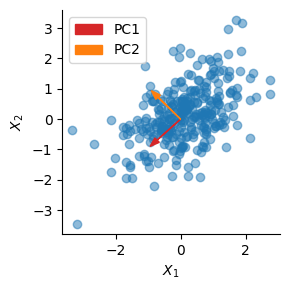

In [85]:
figure(figsize=(3,3))
scatter(X[1,:], X[2,:], alpha=0.5)
arrow(0, 0, V[1,1], V[2,1], head_width=0.2, label="PC1", color="tab:red")
arrow(0, 0, V[1,2], V[2,2], head_width=0.2, label="PC2", color="tab:orange")
xlabel(L"$X_1$"); ylabel(L"$X_2$")
legend(); tight_layout()

Oja則が主成分分析を実行できることを示す．

重みの変化量の期待値を取る．

$$
\begin{aligned}
\frac{d\mathbf{w}}{dt} &= \eta \left(\mathbf{x}y - y^2 \mathbf{w}\right)=\eta \left(\mathbf{x}\mathbf{x}^\top \mathbf{w} - \left[\mathbf{w}^\top \mathbf{x}\mathbf{x}^\top \mathbf{w}\right] \mathbf{w}\right)\\
\mathbb{E}\left[\frac{d\mathbf{w}}{dt}\right] &= \eta \left(\mathbf{C} \mathbf{w} - \left[\mathbf{w}^\top \mathbf{C} \mathbf{w}\right] \mathbf{w}\right)\\
\end{aligned}
$$

$\mathbf{C}:=\mathbb{E}[\mathbf{x}\mathbf{x}^\top]\in \mathbb{R}^{d\times d}$とする．$\mathbf{x}$の平均が0の場合，$\mathbf{C}$は分散共分散行列である．$\mathbb{E}\left[\dfrac{d\mathbf{w}}{dt}\right]=0$となる$\mathbf{w}$が収束する固定点(fixed point)では次の式が成り立つ．

$$
\mathbf{C}\mathbf{w} = \lambda \mathbf{w}
$$

これは固有値問題であり，$\lambda:=\mathbf{w}^\top \mathbf{C} \mathbf{w}$は固有値，$\mathbf{w}$は固有ベクトル(eigen vector)になる．

ここでサンプルサイズを$n$とし，$\mathbf{X} \in \mathbb{R}^{d\times n}, \mathbf{y}=\mathbf{X}^\top\mathbf{w} \in \mathbb{R}^n$とする．標本平均で近似して$\mathbf{C}\simeq \mathbf{X}\mathbf{X}^\top$とする．この場合，

$$
\begin{aligned}
\mathbb{E}\left[\frac{d\mathbf{w}}{dt}\right] &\simeq \eta \left(\mathbf{X}\mathbf{X}^\top \mathbf{w} - \left[\mathbf{w}^\top \mathbf{X}\mathbf{X}^\top \mathbf{w}\right] \mathbf{w}\right)\\
&=\eta \left(\mathbf{X}\mathbf{y} - \left[\mathbf{y}^\top\mathbf{y}\right] \mathbf{w}\right)
\end{aligned}
$$

となる．

In [86]:
w = randn(2) # initialize weight
w ./= sqrt.(sum(w.^2)) # L2 normalize
initw = copy(w) # save initial weight
η = 1e-3 # learning rate
for _ in 1:200
    y = X' * w  
    w += η * (X * y - y' * y * w) # Oja's rule
end

In [77]:
θ = 0:1e-2:2pi

0.0:0.01:6.28

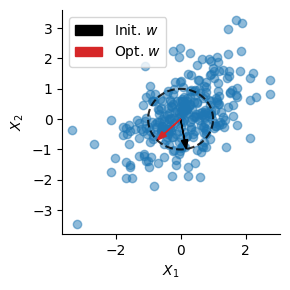

In [91]:
figure(figsize=(3,3))
scatter(X[1,:], X[2,:], alpha=0.5)
arrow(0,0,initw[1],initw[2], head_width=0.2, color="k", label=L"Init. $w$", length_includes_head=true)
arrow(0,0,w[1],w[2], head_width=0.2, color="tab:red", label=L"Opt. $w$", length_includes_head=true)
plot(cos.(θ), sin.(θ), "k--", alpha=0.8)
xlabel(L"$X_1$"); ylabel(L"$X_2$")
tight_layout()
legend(); tight_layout()

$q$個の複数出力を持つ場合を考えよう．重み行列を$\mathbf{W} \in \mathbb{R}^{q\times d}$, 出力を$\mathbf{y}=\mathbf{W}\mathbf{x} \in \mathbb{R}^{q}, \mathbf{Y}=\mathbf{W}\mathbf{X} \in \mathbb{R}^{q\times n}$とする．この場合の更新則は

$$
\begin{align}
\frac{d\mathbf{W}}{dt} &= \eta \left(\mathbf{y}\mathbf{x}^\top - \mathrm{Diag}\left[\mathbf{y}\mathbf{y}^\top\right] \mathbf{W}\right)\\
\mathbb{E}\left[\frac{d\mathbf{W}}{dt} \right] &\simeq \eta \left(\mathbf{Y}\mathbf{X}^\top - \mathrm{Diag}\left[\mathbf{Y}\mathbf{Y}^\top\right] \mathbf{W}\right)\\
\end{align}
$$

となる．ただし，$\mathrm{Diag}(\cdot)$は行列の対角成分からなる対角行列を生み出す作用素である．


### Sanger則
**Sanger則 (Sanger's rule)**，あるいは**一般化Hebb則 (generalized Hebbian algorithm; GHA)** は，Oja則を複数の出力を持つニューロンに拡張したものである．Oja則ではPCAの第1主成分しか求めることができなかったが，Sanger則を用いれば第2主成分以降も求めることができる．PCAでは各主成分ベクトルは直交するという拘束条件があるが，Gram–Schmidtの直交化法(Gram–Schmidt orthonormalization)を学習則に取り入れることでPCAを実現している．

$$
\frac{d\mathbf{W}}{dt} = - \mathrm{lower}\left[\mathbf{W}\mathbf{W}^\top\right] \mathbf{W}
$$

$\mathrm{lower}(\cdot)$は行列の対角成分を含め上側の要素を0にした行列を作り出す作用素である．この過程では$\mathbf{W}$の各行は直交化されるが，正規化はされない．

Gram–Schmidtの正規直交化法とOja則を組み合わせたのがSanger則であり，

$$
\frac{d\mathbf{W}}{dt} = \eta \left(\mathbf{y}\mathbf{x}^\top - \mathrm{LT}\left[\mathbf{y}\mathbf{y}^\top\right] \mathbf{W}\right)
$$

$\mathrm{LT}(\cdot)$は行列の対角成分より上側の要素を0にした下三角行列(lower triangular matrix)を作り出す作用素である．

In [9]:
W = randn(2, 2) # initialize weight
W ./= sqrt.(sum(W.^2, dims=2)) # normalize
initW = copy(W) # save initial weight
for _ in 1:200
    Y = W * X
    W += η * (Y * X' - LowerTriangular(Y * Y') * W) # Sanger's rule
end

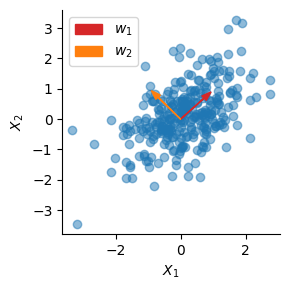

In [10]:
figure(figsize=(3,3))
scatter(X[1,:], X[2,:], alpha=0.5)
arrow(0, 0, W[1,1], W[1,2], head_width=0.2, label=L"$w_1$", color="tab:red")
arrow(0, 0, W[2,1], W[2,2], head_width=0.2, label=L"$w_2$", color="tab:orange")
xlabel(L"$X_1$"); ylabel(L"$X_2$")
legend(); tight_layout()

Oja則，Sanger則をまとめて一つの関数にしておこう．`identity()`は恒等関数である．

In [20]:
function HebbianPCA(X; n_components=10, η=1e-6, maxiter=200, func=identity, orthogonal=true)
    # X : n x m -> Y : n_components x m
    n = size(X)[1]
    X = (X .- mean(X, dims=2)) ./ std(X, dims=2) # normalization
    Y = nothing
    W = randn(n_components, n) # initialize weight
    W ./= sqrt.(sum(W.^2, dims=2)) # normalization
    for _ in 1:maxiter
        Y = func.(W * X)
        if orthogonal
            W .+= η * (Y * X' - LowerTriangular(Y * Y') * W) # Sanger's rule
        else
            W .+= η * (Y * X' - Diagonal(Y * Y') * W) # Oja's rule
        end
    end
    return Y, W
end;

HebbianPCA (generic function with 1 method)

## 非線形Hebb学習
{cite:p}`Oja1997-hr`

{cite:p}`Brito2016-mx`

### 非負主成分分析によるグリッドパターンの創発
内側嗅内皮質(MEC)にある**グリッド細胞 (grid cells)** は六角形格子状の発火パターンにより自己位置等を符号化するのに貢献している．この発火パターンを生み出すモデルは多数あるが，その中でもシンプルなのが([Dordek et al., eLife, 2016](https://elifesciences.org/articles/10094))である．**場所細胞(place cells)** の発火パターンを**非負主成分分析(nonnegative principal component analysis)** で次元削減するとグリッド細胞のパターンが生まれる，という内容である．このモデルはfeedforwardであり，場所細胞→グリッド細胞という逆向きの投射を考えているので完璧ではないが，グリッドパターンは最速で出すことができる．([Sorscher et al., NeurIPS2019, 2019](https://proceedings.neurips.cc/paper/2019/hash/6e7d5d259be7bf56ed79029c4e621f44-Abstract.html))では**非負値行列因子分解 (NMF: nonnegative matrix factorization)** で問題ないと書いてあったのでお手軽に実行できるコードを書こうと思い今回の記事を書いた．

#### 場所細胞の発火パターン
訓練データとなる場所細胞の発火パターンを人工的に作成する．まずライブラリを読み込む．

場所細胞の発火パターンは**Difference of Gaussians (DoG)** で近似する．DoGは大きさの異なる2つのガウス関数の差分を取った関数であり，画像に適応すればband-passフィルタとして機能する．

[網膜神経節細胞等の受容野](https://bsd.neuroinf.jp/wiki/%E5%8F%97%E5%AE%B9%E9%87%8E#.E4.B8.AD.E5.BF.83.E5.91.A8.E8.BE.BA.E6.8B.AE.E6.8A.97.E5.9E.8B.E5.8F.97.E5.AE.B9.E9.87.8E)のON中心OFF周辺型受容野のモデルとしても用いられる．受容野中央では活動が大きく，その周辺では活動が抑制される，という特性を持つ．

2次元のガウス関数とDoG関数を実装する．

In [21]:
# Gaussian mask for inputs
function gaussian2d(center, width, height, step, sigma, scale=1)
    x, y = range(-width/2, width/2, length=step), range(-height/2, height/2, length=step)
    f(x,y) = exp(-((x-center[1])^2 + (y-center[2])^2) / (2.0*scale*(sigma^2)))
    gau = f.(x', y)
    return gau ./ sum(gau)
end

gaussian2d (generic function with 2 methods)

In [22]:
function DoG(center, width=2.2, height=2.2, step=55, sigma=0.12, surround_scale=2; rescale=true)
    g1 = gaussian2d(center, width, height, step, sigma)
    g2 = gaussian2d(center, width, height, step, sigma, surround_scale)
    dog = g1 - g2
    if rescale
        dog = (dog .- minimum(dog)) / (maximum(dog) - minimum(dog)) # recale in [0,1]
    end
    return dog 
end

DoG (generic function with 6 methods)

モデルのパラメータを設定する．場所細胞の数は増やせば増やすほど後の結果は綺麗になる．

In [67]:
Np = 5000          # 場所細胞の数
Ng = 9             # 格子細胞の数
sigma = 0.12       # 場所細胞のtuning curveの幅 [m]
surround_scale = 2 # DoGのσ²の比率
box_width = 2.2    # 箱の横幅 [m]
box_height = 2.2   # 箱の縦幅 [m]
step = 35;         # 空間位置の離散化数

先にガウス関数とDoG関数がどのような見た目になるか確認しよう．

In [68]:
c_eg = zeros(2)
gau_eg = gaussian2d(c_eg, box_width, box_height, step, sigma)
dog_eg = DoG(c_eg, box_width, box_height, step, sigma, surround_scale, rescale=false);

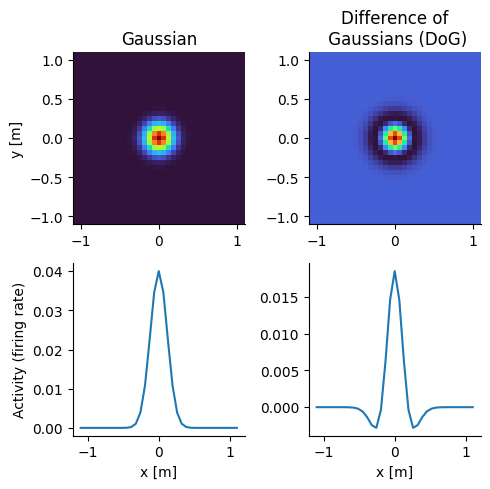

In [69]:
figure(figsize=(5,5))
subplot(2,2,1)
title("Gaussian")
imshow(gau_eg, cmap="turbo", extent=(-box_width/2, box_width/2, -box_height/2, box_height/2))
ylabel("y [m]")
subplot(2,2,2)
title("Difference of\n Gaussians (DoG)")
imshow(dog_eg, cmap="turbo", extent=(-box_width/2, box_width/2, -box_height/2, box_height/2))
subplot(2,2,3)
xp = range(-box_width/2, box_width/2, length=step)
plot(xp, gau_eg[div(step, 2), :])
xlabel("x [m]"); ylabel("Activity (firing rate)")
subplot(2,2,4)
plot(xp, dog_eg[div(step, 2), :])
xlabel("x [m]")
tight_layout()

場所細胞の活動パターンを生み出す．それぞれの場所受容野の中心は一様分布で生み出し，scalingにより境界上にcenterがある場所細胞を抑制しておく．

In [70]:
centers = [rand(Uniform(-box_width/2, box_width/2), Np) rand(Uniform(-box_height/2, box_height/2), Np)];
centers *= 0.9;

Xp = hcat([DoG(centers[i, :], box_width, box_height, step, sigma, surround_scale)[:] for i in 1:Np]...)';

In [71]:
@time Yp, Wp = HebbianPCA(Xp, n_components=Ng, η=1e-6, orthogonal=true);

  1.407892 seconds (4.25 k allocations: 356.084 MiB, 1.39% gc time)


In [72]:
H_pca = reshape(Yp, (Ng, step, step));

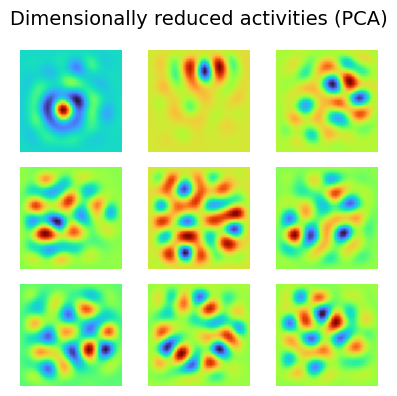

In [73]:
figure(figsize=(4,4))
suptitle("Dimensionally reduced activities (PCA)", fontsize=14)
for i in 1:Ng
    subplot(3,3,i)
    imshow(H_pca[i, :, :], cmap="turbo")
    axis("off")
end
tight_layout()

自己相関マップ(autocorrelation map)を確認する．

In [74]:
function correlate_fft(x, y)
    corr = fftshift(real(ifft(fft(x) .* conj(fft(y)))))
    return corr / maximum(corr)
end;

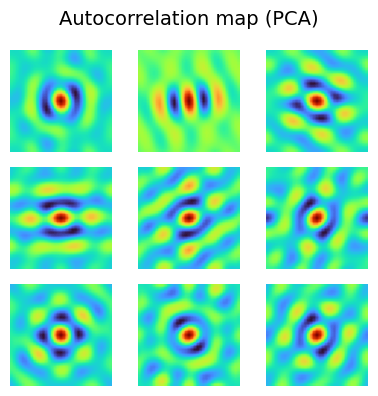

In [75]:
figure(figsize=(4,4))
suptitle("Autocorrelation map (PCA)", fontsize=14)
for i in 1:Ng
    subplot(3,3,i)
    corr = correlate_fft(H_pca[i, :, :], H_pca[i, :, :])
    imshow(corr, cmap="turbo")
    axis("off")
end
tight_layout()

In [54]:
relu(x) = max(x, 0)
#softplus(x) = log(1 + exp(x))

relu (generic function with 1 method)

In [93]:
Ys, Ws = HebbianPCA(Xp; n_components=Ng, η=1e-5, maxiter=2000, func=relu, orthogonal=true);

In [94]:
H_nmf = reshape(Ys, (Ng, step, step));

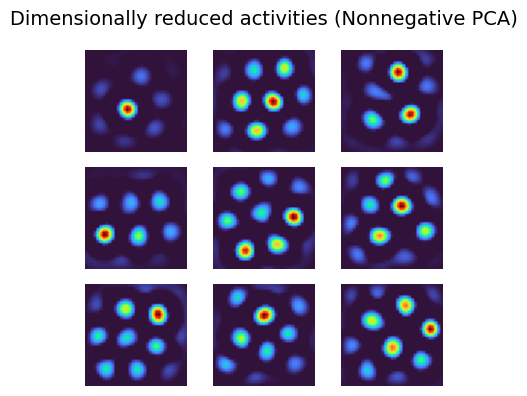

In [95]:
figure(figsize=(4,4))
suptitle("Dimensionally reduced activities (Nonnegative PCA)", fontsize=14)
for i in 1:Ng
    subplot(3,3,i)
    imshow(H_nmf[i, :, :], cmap="turbo")
    axis("off")
end
tight_layout()

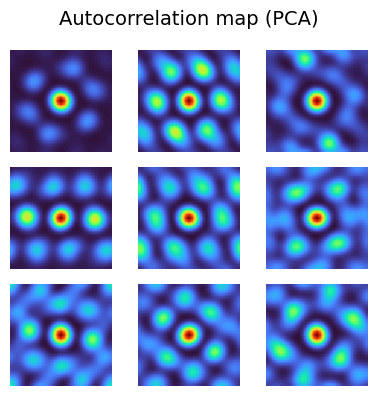

In [96]:
figure(figsize=(4,4))
suptitle("Autocorrelation map (PCA)", fontsize=14)
for i in 1:Ng
    subplot(3,3,i)
    corr = correlate_fft(H_nmf[i, :, :], H_nmf[i, :, :])
    imshow(corr, cmap="turbo")
    axis("off")
end
tight_layout()

## 参考文献
```{bibliography}
:filter: docname in docnames
```